In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Car_sales.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### Treating the outliers


In [3]:
df.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      0.000000
__year_resale_value    22.929936
Vehicle_type            0.000000
Price_in_thousands      1.273885
Engine_size             0.636943
Horsepower              0.636943
Wheelbase               0.636943
Width                   0.636943
Length                  0.636943
Curb_weight             1.273885
Fuel_capacity           0.636943
Fuel_efficiency         1.910828
Latest_Launch           0.000000
Power_perf_factor       1.273885
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

## Outliers treatment

### Box plot

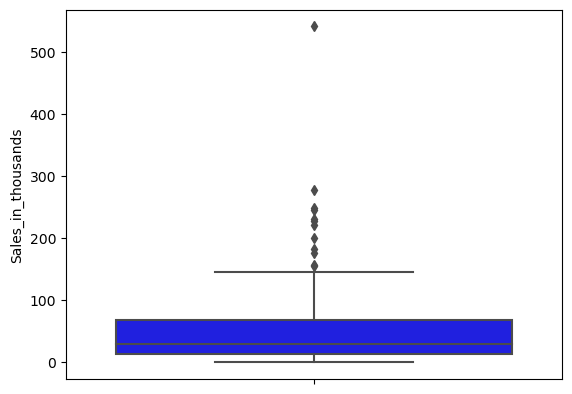

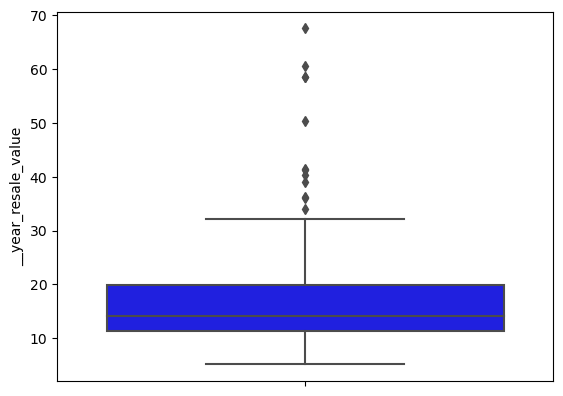

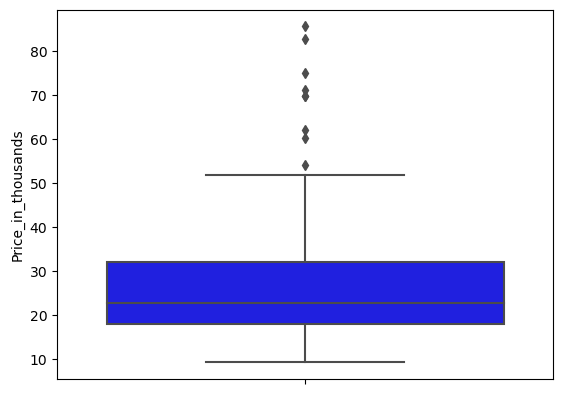

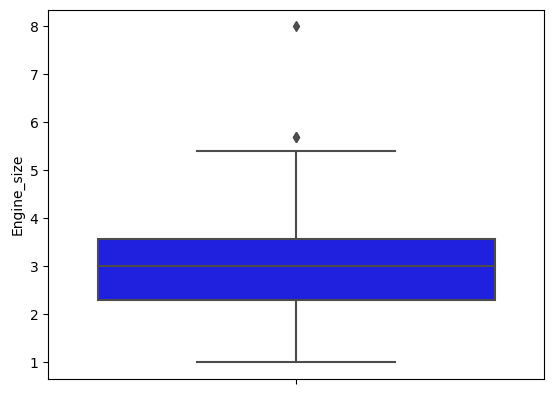

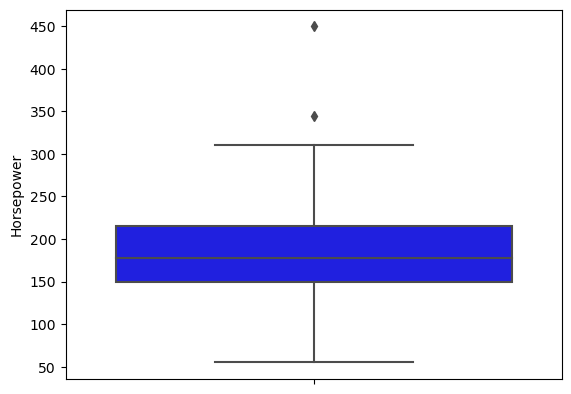

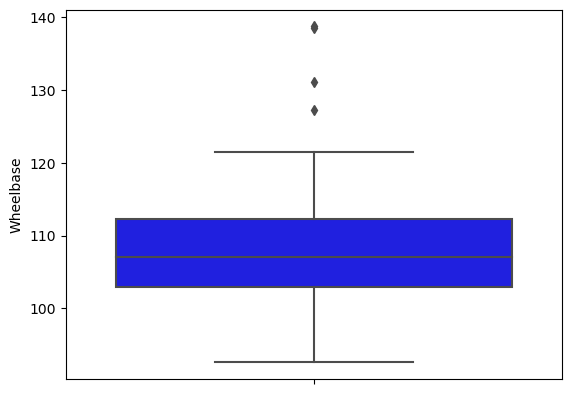

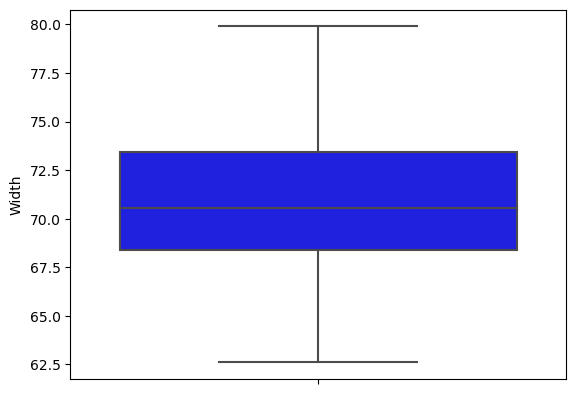

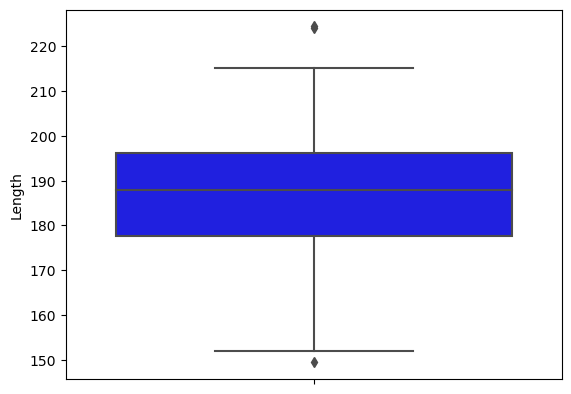

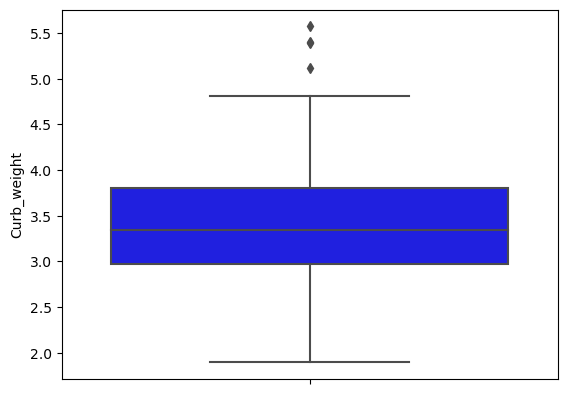

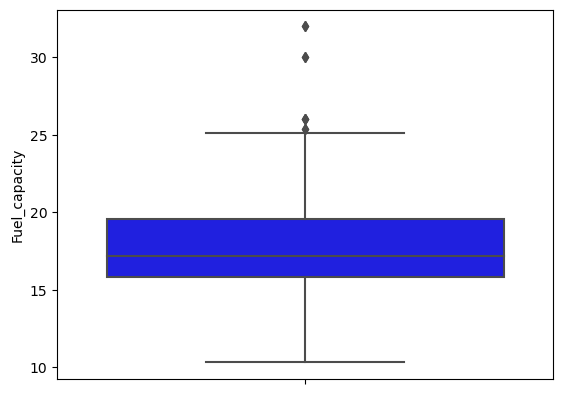

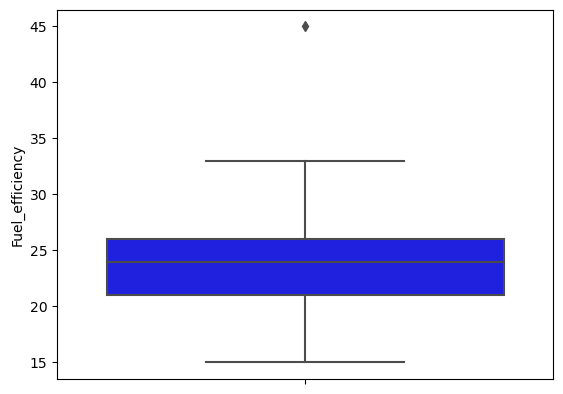

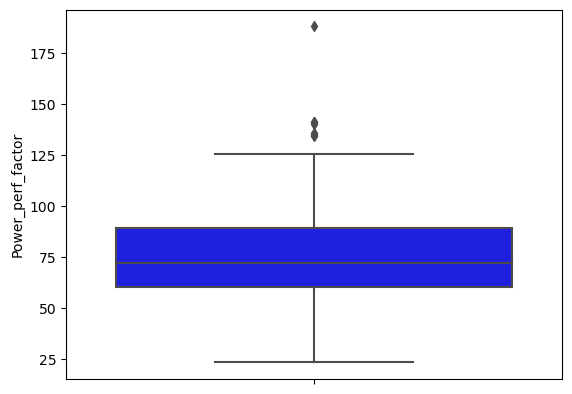

In [5]:
for i in df.columns:
    if df[i].dtype !='object':
        sns.boxplot(y=df[i],color='blue')
        plt.show()

### SETTING OUTLIERS LIMIT

In [69]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [70]:
for column in df.columns:
    if df[column].dtype !='object':
        UL,LL = outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

### LETS PLOT THE BARPLOT AGAIN TO SEE THE DIFFERENCE

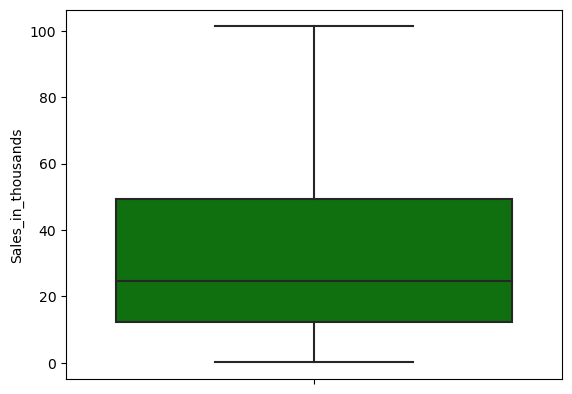

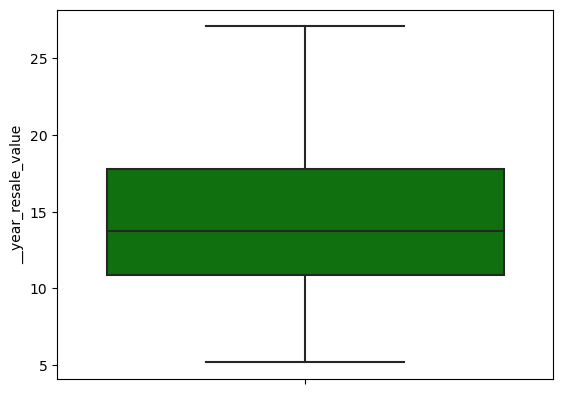

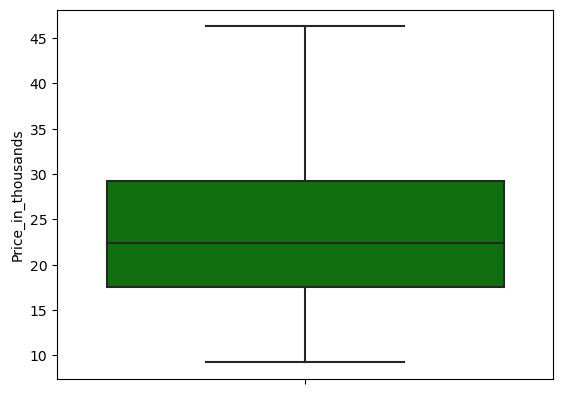

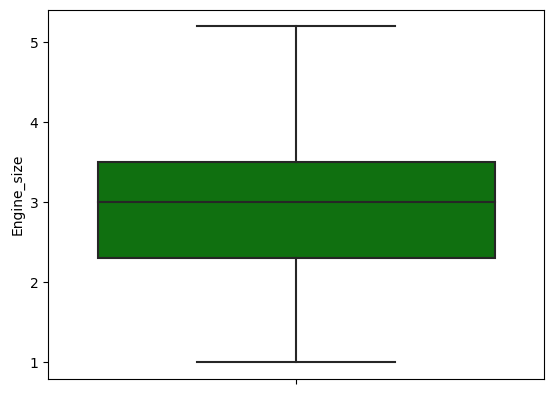

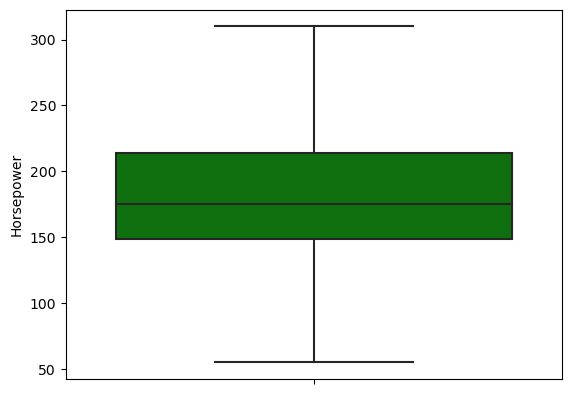

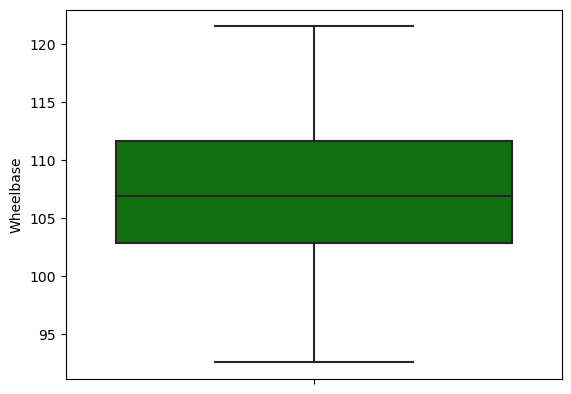

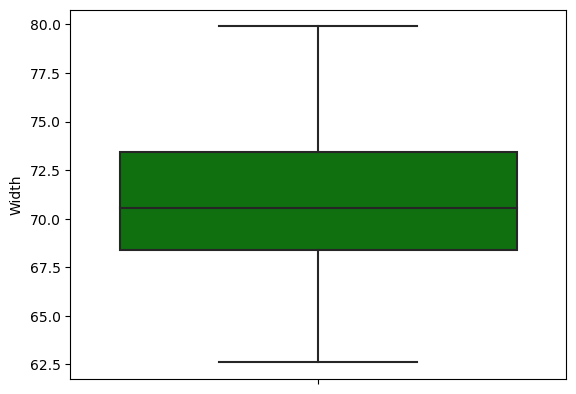

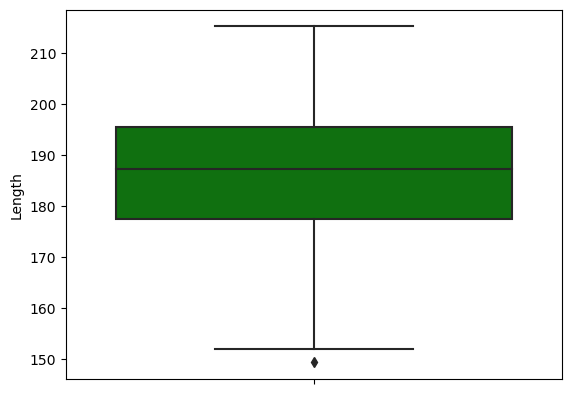

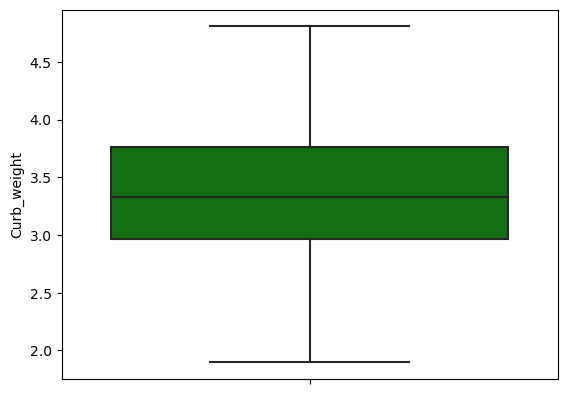

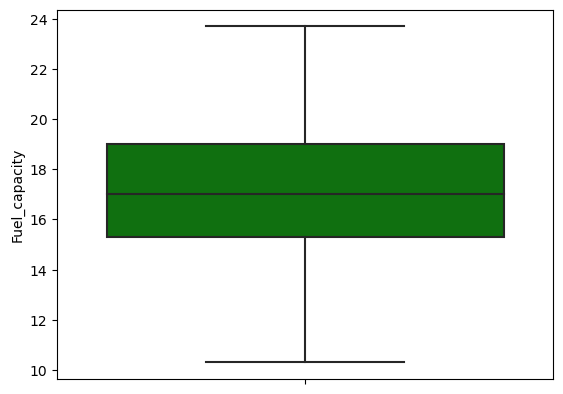

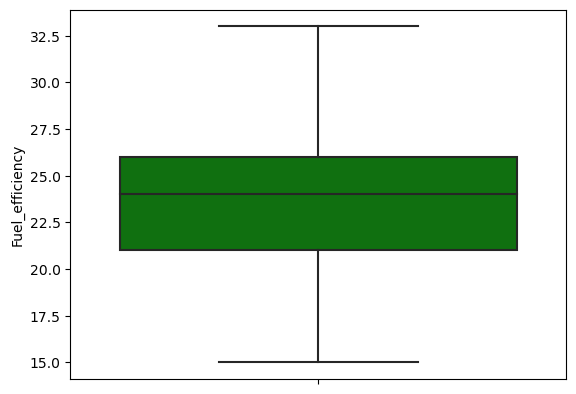

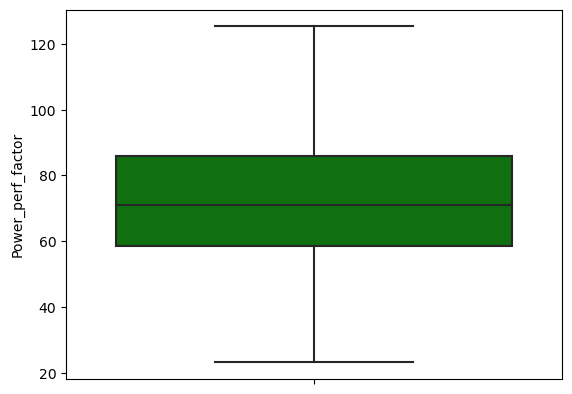

In [71]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='green')
        plt.show()

In [72]:
df.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands     12.738854
__year_resale_value    32.484076
Vehicle_type            0.000000
Price_in_thousands      8.280255
Engine_size             3.184713
Horsepower              1.910828
Wheelbase               3.184713
Width                   0.636943
Length                  1.910828
Curb_weight             3.821656
Fuel_capacity           9.554140
Fuel_efficiency         2.547771
Latest_Launch           0.000000
Power_perf_factor       5.732484
dtype: float64

In [73]:
df.dropna(inplace=True)
df.isnull().mean()*100

Manufacturer           0.0
Model                  0.0
Sales_in_thousands     0.0
__year_resale_value    0.0
Vehicle_type           0.0
Price_in_thousands     0.0
Engine_size            0.0
Horsepower             0.0
Wheelbase              0.0
Width                  0.0
Length                 0.0
Curb_weight            0.0
Fuel_capacity          0.0
Fuel_efficiency        0.0
Latest_Launch          0.0
Power_perf_factor      0.0
dtype: float64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         79 non-null     object 
 1   Model                79 non-null     object 
 2   Sales_in_thousands   79 non-null     float64
 3   __year_resale_value  79 non-null     float64
 4   Vehicle_type         79 non-null     object 
 5   Price_in_thousands   79 non-null     float64
 6   Engine_size          79 non-null     float64
 7   Horsepower           79 non-null     float64
 8   Wheelbase            79 non-null     float64
 9   Width                79 non-null     float64
 10  Length               79 non-null     float64
 11  Curb_weight          79 non-null     float64
 12  Fuel_capacity        79 non-null     float64
 13  Fuel_efficiency      79 non-null     float64
 14  Latest_Launch        79 non-null     object 
 15  Power_perf_factor    79 non-null     floa

In [81]:
df.head(100)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
10,Buick,Century,91.561,12.475,Passenger,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,11/2/2011,71.181451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,9.761,11.425,Passenger,14.900,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
146,Volkswagen,Jetta,83.721,13.240,Passenger,16.700,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
147,Volkswagen,Passat,51.102,16.725,Passenger,21.200,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
148,Volkswagen,Cabrio,9.569,16.575,Passenger,19.990,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372
